In [1]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data/', one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

In [4]:
# tf Graph Input
x = tf.placeholder('float', [None, 784]) # mnist data image of shape 28 * 28  = 784
y = tf.placeholder('float', [None, 10]) # 0-9 digits recognition => 10 classes

In [5]:
# create model
# set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [6]:
# Construct model
activation = tf.nn.softmax(tf.matmul(x, W) + b) # softmax

In [8]:
# minimise error using cross entropy
cross_entropy = y*tf.log(activation)
cost = tf.reduce_mean(-tf.reduce_sum(cross_entropy, reduction_indices = 1))

In [10]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [28]:
# plot setting
avg_set = []
epoch_set = []

Epoch:   1
cost =  1.1772673256830744
Epoch:   2
cost =  0.662822686054489
Epoch:   3
cost =  0.5508778858726678
Epoch:   4
cost =  0.4968575291200117
Epoch:   5
cost =  0.4638159229538654
Epoch:   6
cost =  0.44090098933740046
Epoch:   7
cost =  0.4239816673506391
Epoch:   8
cost =  0.41066782978448035
Epoch:   9
cost =  0.399908896874298
Epoch:   10
cost =  0.3909734084389429
Epoch:   11
cost =  0.3832990354299548
Epoch:   12
cost =  0.3768260226466438
Epoch:   13
cost =  0.37100298166275
Epoch:   14
cost =  0.36593152471564083
Epoch:   15
cost =  0.36135013054717635
Epoch:   16
cost =  0.3572995919260111
Epoch:   17
cost =  0.3535484273867172
Epoch:   18
cost =  0.35016926732930265
Epoch:   19
cost =  0.3469974766265263
Epoch:   20
cost =  0.3441172700578515
Epoch:   21
cost =  0.3414194185354494
Epoch:   22
cost =  0.33898554181510776
Epoch:   23
cost =  0.3366474068164827
Epoch:   24
cost =  0.3345205138759179
Epoch:   25
cost =  0.33246927063573506
Training phase finshed 


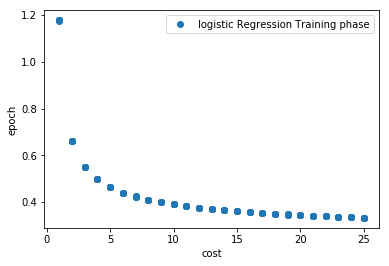

Model accuracy:  0.9142


In [33]:
# Initialise the variable 
init = tf.initialize_all_variables()
# launch the graph

with tf.Session() as sess:
    sess.run(init)
    
    #training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        
        #loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict = {
                x: batch_xs, y: batch_ys})
            avg_cost += sess.run(cost, feed_dict = {
                x: batch_xs, y: batch_ys})/total_batch
        if epoch % display_step == 0:
            print('Epoch: ', "" , (epoch+1))
            print('cost = ', avg_cost)
            avg_set.append(avg_cost)
            epoch_set.append(epoch+1)
            
    print("Training phase finshed ")
    plt.plot(epoch_set, avg_set, 'o', label = 'logistic Regression Training phase')
    plt.xlabel('cost')
    plt.ylabel('epoch')
    plt.legend()
    plt.show()
    
    # Test model
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
    
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float')) 
    print('Model accuracy: ', accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))
                                                                                                                          